In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chemical_properties1515.csv contains the numerical values for chemical features
- todo: FIX NAMING

In [15]:
df = pd.read_csv("Chemical_descriptors.csv")
df1515 = pd.read_csv("Chemical_properties1515.csv")
dfPCA = pd.read_csv("PCAremoveNAN.csv")

In [4]:
df.tail()
df1515.tail()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
794,8.541389,0.225231,8.541389,0.225231,0.669277,143.211,134.139,143.040485,50,0,...,0,0,0,0,0,1,0,0,0,0
795,10.495833,-2.369907,10.495833,1.057545,0.344170,193.131,184.059,193.035376,76,0,...,0,0,0,0,0,0,0,0,0,0
796,8.720486,-5.625000,8.720486,5.625000,0.354606,139.926,138.918,139.910177,32,0,...,0,0,0,0,0,0,0,0,0,0
797,13.313695,-2.745034,13.313695,0.134831,0.256534,444.440,420.248,444.153266,170,0,...,0,0,0,0,0,0,0,0,0,0
798,0.000000,0.000000,0.000000,0.000000,0.327748,18.015,15.999,18.010565,8,0,...,0,0,0,0,0,0,0,0,0,0


## For testing purposes: reading only the csv with RDKit numericals

In [17]:
# df2 = pd.read_csv("chemical_properties.csv")
# xx = df.loc[:, df2.columns].values

xx = dfPCA.loc[:,dfPCA.columns].values

In [18]:
xx = StandardScaler().fit_transform(xx)

In [19]:
xx.shape

(799, 209)

In [20]:
np.mean(xx)

3.499717949845695e-18

In [9]:
np.mean(xx), np.std(xx)

(nan, nan)

In [21]:
feat_cols = ["feature" +str(i) for i in range(xx.shape[1])]

In [22]:
normalized_descriptors = pd.DataFrame(xx, columns = feat_cols)

In [27]:
normalized_descriptors.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207
50,0.274190,-0.788322,0.274190,-0.046420,1.105405,-0.312463,-0.304509,-0.312384,-0.341493,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
51,1.045625,-0.975402,1.045625,-0.562720,-2.127937,1.722894,1.749879,1.723049,1.680505,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
52,0.288756,0.095961,0.288756,0.154111,1.059787,-0.225768,-0.213089,-0.225789,-0.184226,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
53,-0.208882,-0.813067,-0.208882,2.756306,0.223384,-0.609145,-0.599856,-0.609062,-0.656026,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
54,-3.144795,0.901265,-3.144795,-0.588883,0.074705,-0.930117,-0.942698,-0.930171,-0.925626,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0


In [20]:
normalized_descriptors.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207
0,-4.043257,1.210775,-4.043257,-0.584914,0.170677,-0.991633,-1.011443,-0.991689,-0.961670,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
1,-4.043257,1.210775,-4.043257,-0.584914,0.170677,-0.991633,-1.011443,-0.991689,-0.961670,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
2,0.807750,-1.130203,0.807750,-0.530044,-1.377634,0.756238,0.801431,0.756398,0.678316,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
3,0.228214,-1.125115,0.228214,-0.115547,0.972132,-0.173193,-0.173553,-0.173122,-0.202668,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
4,-0.358837,1.505770,-0.358837,0.305040,0.747649,-0.804030,-0.828954,-0.804102,-0.758366,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0


# Replace nan w 0's

In [13]:
normalized_descriptors.replace(np.nan, 0)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207
0,-4.043257,1.210775,-4.043257,-0.584914,0.170677,-0.991633,-1.011443,-0.991689,-0.961670,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
1,-4.043257,1.210775,-4.043257,-0.584914,0.170677,-0.991633,-1.011443,-0.991689,-0.961670,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
2,0.807750,-1.130203,0.807750,-0.530044,-1.377634,0.756238,0.801431,0.756398,0.678316,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
3,0.228214,-1.125115,0.228214,-0.115547,0.972132,-0.173193,-0.173553,-0.173122,-0.202668,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
4,-0.358837,1.505770,-0.358837,0.305040,0.747649,-0.804030,-0.828954,-0.804102,-0.758366,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,-0.697108,1.304576,-0.697108,-0.301932,2.023717,-0.616415,-0.629218,-0.616692,-0.622830,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,11.496376,-0.0354,0.0,-0.266732,0.0
795,0.068559,0.223794,0.068559,0.743791,0.179343,-0.484696,-0.486972,-0.484696,-0.446633,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
796,-0.626945,-1.131834,-0.626945,6.482361,0.238545,-0.625083,-0.615600,-0.624957,-0.744812,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0
797,1.172476,0.067568,1.172476,-0.415511,-0.317830,0.178409,0.186042,0.178307,0.190387,-0.094806,...,-0.279772,0.0,0.0,0.0,0.0,-0.086984,-0.0354,0.0,-0.266732,0.0


In [23]:
pca_descriptors = PCA(n_components= 2)
principalComponents_descriptors = pca_descriptors.fit_transform(normalized_descriptors)

In [24]:
pca_descriptors

PCA(n_components=2)

In [25]:
principal_descriptors_df = pd.DataFrame(data= principalComponents_descriptors, columns= ["principal component 1", "principal comonent 2"])

(-5.0, 5.0)

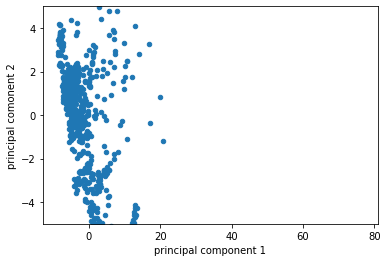

In [26]:
#principal_descriptors_df.tail()
ax  = principal_descriptors_df.plot.scatter(x = "principal component 1", y ="principal comonent 2")
ax.set_ylim(-5, 5)

In [27]:
print("Explained variation per principal comonent: {}".format(pca_descriptors.explained_variance_))

Explained variation per principal comonent: [57.02792567 13.523498  ]


<Figure size 432x288 with 0 Axes>

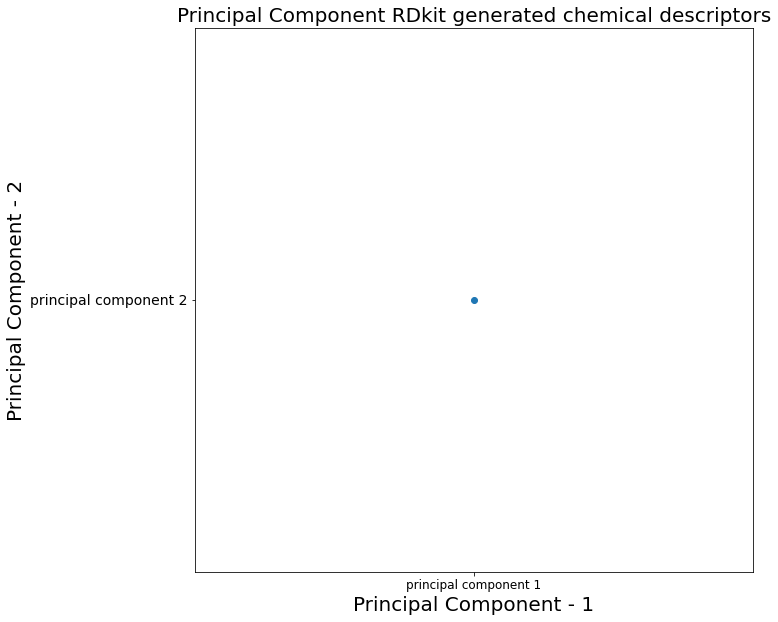

In [28]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component RDkit generated chemical descriptors",fontsize=20)

colors = ["r", "g"]
# target = # Something easy, like charge? inreplace = "positive" / "negative"
plt.scatter(x ="principal component 1", y = "principal component 2")
